In [1]:
# Snapshot governance data analysis and visualization

In [2]:
# Load 'cerebrumdao_snapshot_proposals.csv' dataframe

import pandas as pd

df = pd.read_csv('cerebrumdao_snapshot_proposals.csv')
df.head()

,id,title,body,choices,start,end,state,author,created,scores,scores_total,votes
0,0xd9b7956d5c4e581663406f8229f305e4956b4da8ab2e...,CDP-17: [Funding] SK-Channels,_One liner: The SK -channel project is develop...,"['For', 'Against', 'Abstain']",2025-05-01 23:04:04,2025-05-06 23:04:04,closed,0xeEd06591f929895b27752F690e970BcCBe963f66,2025-05-01 21:04:04,"[9471106026.245836, 0, 0]",9.471106e+09,12
1,0x1127ca0bbabbc459e2cb234fa7c8d4193c3ac961ac53...,CDP-16: Treasury Management,# Summary\n\nCerebrum DAO has been operating p...,"['For', 'Against', 'Abstain']",2024-12-29 15:37:08,2025-01-03 15:37:08,closed,0xeEd06591f929895b27752F690e970BcCBe963f66,2024-12-29 13:37:08,"[6639917944.794216, 0, 0]",6.639918e+09,16
2,0xc4e8ec238f91f142a91e4b8edf4b05d1c398b083dba5...,CDP-15 - OTC Funding Proposal,Cerebrum DAO has been approached by multiple p...,"['For', 'Against', 'Abstain']",2024-12-19 22:52:09,2024-12-24 22:52:09,closed,0xeEd06591f929895b27752F690e970BcCBe963f66,2024-12-19 20:52:09,"[8085663111.249771, 0, 0]",8.085663e+09,14
3,0xb84180deb65bd9aa1bd0514e96c8f272c5458f3eded2...,CDP-14: [Funding] Fission Pharma,***__One liner:__** Fission Pharma is developi...,"['For', 'Against', 'Abstain']",2024-11-13 23:23:50,2024-11-18 23:23:50,closed,0xeEd06591f929895b27752F690e970BcCBe963f66,2024-11-13 21:23:50,"[7410542234.999247, 0, 138055935.22282475]",7.548598e+09,14
4,0xa1b478c6199d3e157e2db7124f2f789b59ee314974f2...,CDP-13: [Funding] Arctic Therapeutics,***One liner:*** *Arctic Therapeutics is accel...,"['For', 'Against', 'Abstain']",2024-10-23 20:49:37,2024-10-28 20:49:37,closed,0xeEd06591f929895b27752F690e970BcCBe963f66,2024-10-23 18:49:37,"[8955337920.012995, 0, 0]",8.955338e+09,12


In [3]:
# Basic data overview

print("Number of proposals:", len(df))
print("Date range:", df['created'].min(), "to", df['created'].max())
print("Columns:", df.columns.tolist())

Number of proposals: 17
Date range: 2024-04-23 14:17:08 to 2025-05-01 21:04:04
Columns: ['id', 'title', 'body', 'choices', 'start', 'end', 'state', 'author', 'created', 'scores', 'scores_total', 'votes']


In [4]:
# Make sure you have a Datetime value

df['created'] = pd.to_datetime(df['created'], errors='coerce')
print(df['created'].dtype)

# confirm is datetime64[ns]

datetime64[ns]


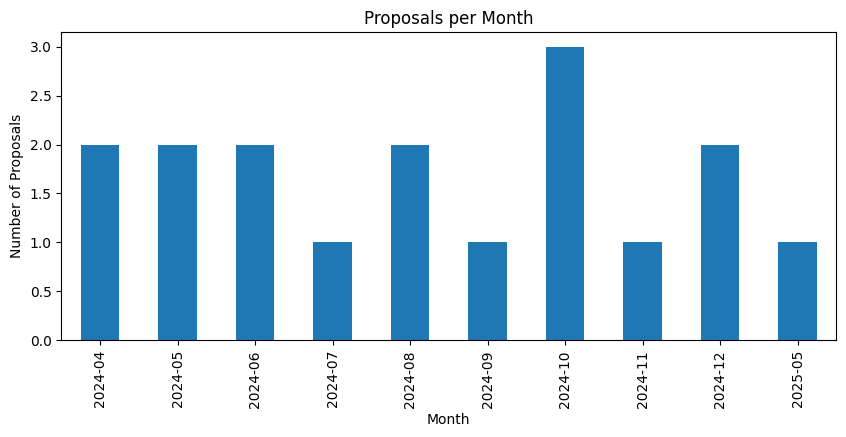

In [5]:
# KPI 1 — Proposal Activity Over Time
#> A healthy DAO should have regular proposals. Plot proposals per month.

df['month'] = df['created'].dt.to_period('M')
proposals_per_month = df.groupby('month').size()

import matplotlib.pyplot as plt

proposals_per_month.plot(kind='bar', figsize=(10,4), title='Proposals per Month')
plt.ylabel('Number of Proposals')
plt.xlabel('Month')
plt.show()

In [6]:
# INTERPRETATION: 1) Are proposals frequent or sporadic? 2)Is activity increasing, steady, or declining?

# Activity seems steady since inception 2404.
# Peak activity Jan 2025 aligned with bigger movement of tokens from Etherscan

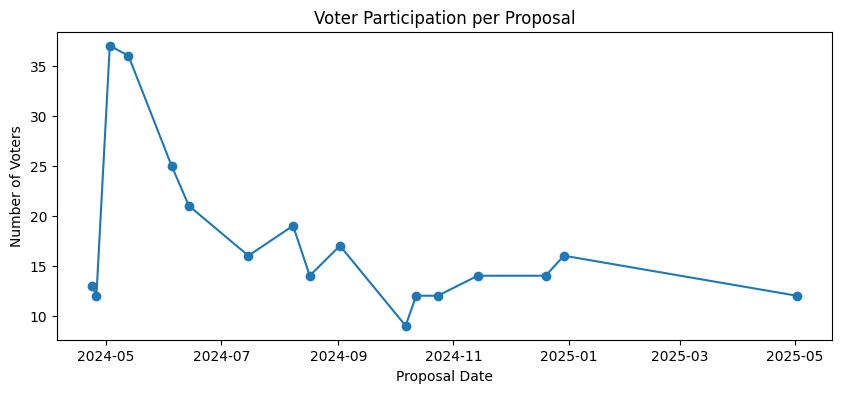

In [7]:
# KPI 2 — Voter Participation
#> High participation = engaged community. Plot number of voters per proposal.

df = df.sort_values('created')
plt.figure(figsize=(10,4))
plt.plot(df['created'], df['votes'], marker='o')
plt.title('Voter Participation per Proposal')
plt.xlabel('Proposal Date')
plt.ylabel('Number of Voters')
plt.show()

In [8]:
# Interpretation: 1) Are most proposals getting votes? 2) Any trends (up/down/flat)?

# the number of votes declined in July 2024 and is steadily low.
# The community is not engaged.

state
closed    17
Name: count, dtype: int64


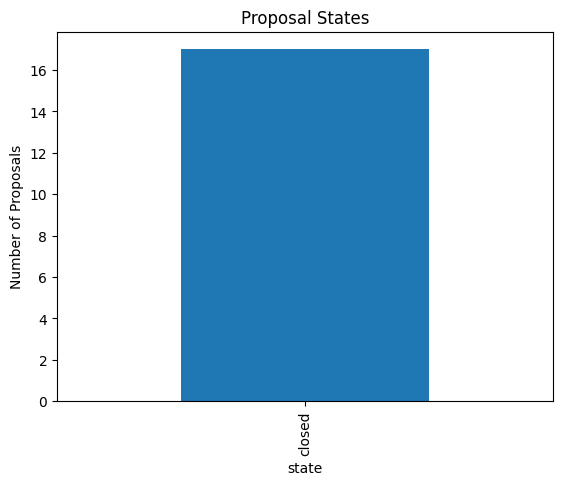

In [9]:
# KPI 3 — Proposal Outcomes
#> Shows if proposals are being decided and executed.
#> Count proposals by state.

print(df['state'].value_counts())
df['state'].value_counts().plot(kind='bar', title='Proposal States')
plt.ylabel('Number of Proposals')
plt.show()

In [10]:
# Interpretation: 1) Are most proposals closed/executed, or left open? 2) Are decisions being made?

# all proposals are closed, decisions are being made

In [11]:
# KPI 4 — Voting Power Distribution
#> Shows if a few whales dominate, or if voting is decentralized.
#> Look at scores (votes per choice) and scores_total (total voting power).

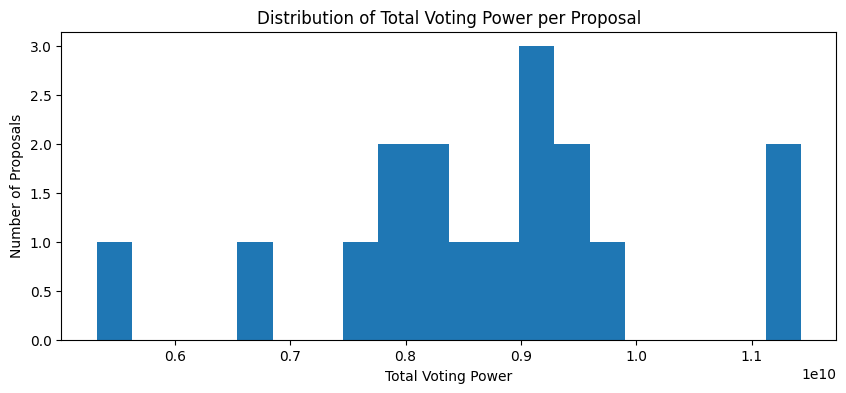

In [12]:
plt.figure(figsize=(10,4))
plt.hist(df['scores_total'], bins=20)
plt.title('Distribution of Total Voting Power per Proposal')
plt.xlabel('Total Voting Power')
plt.ylabel('Number of Proposals')
plt.show()

In [13]:
#Interpretation: 1) Are some proposals dominated by huge voting power? 2) Are there proposals with very little participation?

# some proposals seem dominated by bigger voting power

In [14]:
# KPI 5 — Proposal Topics (Optional, for Deeper Analysis)
#> Shows if proposals align with the DAO’s mission (e.g., neuroscience funding, research, community building).
#> Look at the title and body columns.

# use keyword searches or word clouds for a quick overview.

In [18]:
!pip install wordcloud

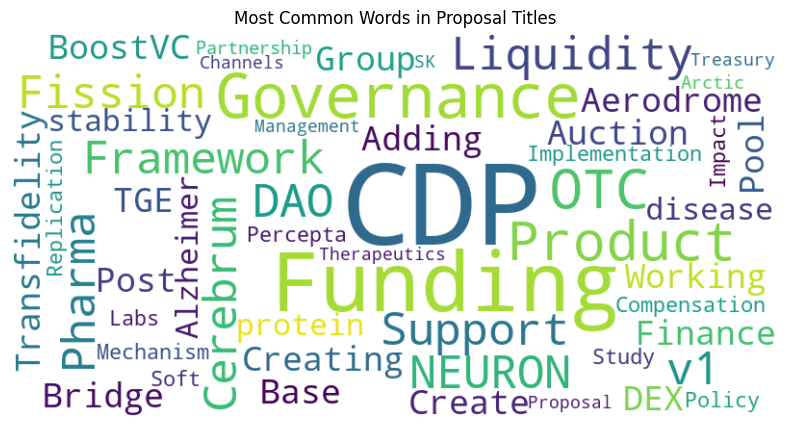

In [19]:
import wordcloud
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Proposal Titles')
plt.show()

In [21]:
print(df['title'].unique()[:10])  # See a sample of titles

# they all start with CDP lets filter out

['CDP-1 [Governance] - Cerebrum DAO Governance Framework v1'
 'CDP-2 [Funding] - Fission Pharma'
 'CDP-3 [Funding} - Post TGE Auction OTC Funding'
 'CDP-4 Adding DEX Support for NEURON'
 'CDP-5 Creating a Product Working Group'
 'CDP-6 OTC Funding and Liquidity Support with BoostVC'
 'CDP-7: Bridge NEURON to Base and Create a Liquidity Pool on Aerodrome Finance'
 "CDP-8: Transfidelity for protein stability in Alzheimer's disease"
 'CDP-9: Governance Framework V1.2 - Implementation of a Soft Governance Mechanism'
 'CDP-10: Cerebrum DAO Compensation Policy']


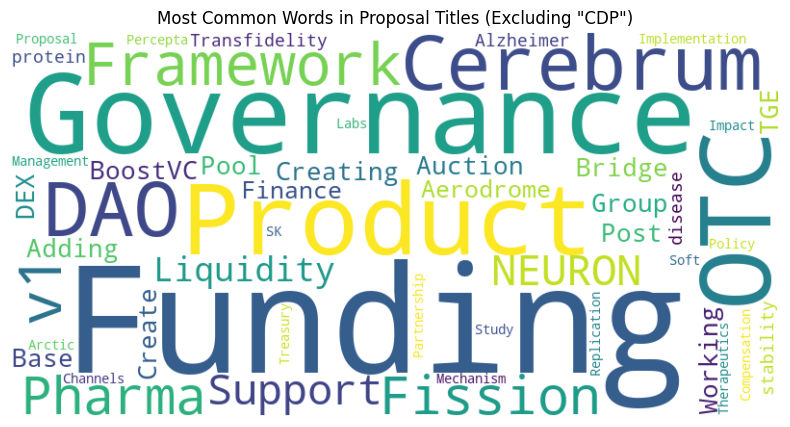

In [23]:
# filter out CDP as possible result in wordcloud

import re

text = ' '.join(df['title'].dropna().tolist())
text = re.sub(r'\bcdp\b', '', text, flags=re.IGNORECASE)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Proposal Titles (Excluding "CDP")')
plt.show()

In [26]:
import re
from collections import Counter

# Combine all titles, remove "CDP" (case-insensitive)
text = ' '.join(df['title'].dropna().tolist())
text = re.sub(r'\bcdp\b', '', text, flags=re.IGNORECASE)

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', text.lower())

# Count word frequencies
word_counts = Counter(words)

# List the top 10 words
top_10 = word_counts.most_common(10)
print("Top 10 words (excluding 'CDP'):")
for word, count in top_10:
    print(f"{word}: {count}")

Top 10 words (excluding 'CDP'):
funding: 8
governance: 4
otc: 3
a: 3
product: 3
cerebrum: 2
dao: 2
framework: 2
v1: 2
2: 2


In [ ]:
# Interpretation: 1) Are proposals about neuroscience, research, funding, etc.? 2) Or are they off-topic?

# it seems that the proposals are mainly admin/management. none of the top 10 words in neuroscience related

# It seems that the governance requires mainly admin stuff and this causes a decrease in community engagement

In [ ]:
#Step 9: Synthesize Findings
#Are proposals frequent and relevant?
#Is the community engaged in voting?
#Is voting power decentralized?
#Are proposals being decided and executed?
#Do proposal topics align with the mission?


#Step 10: Next Steps
#If you want to analyze individual votes (who voted, how much), you can fetch votes for each proposal using the Snapshot API.
#Combine these findings with your on-chain analysis for a holistic view.